In [2]:
filename = 'tijdssignalen.xlsx'

#### Read Excel file

In [3]:
import pandas as pd
xl = pd.read_excel(filename, sheet_name=None)

In [4]:
xlsh = list(xl.keys())
#xlsh

In [5]:
xl[xlsh[0]].head(5)

,Tijd [s],V_X [mm/s],V_Y [mm/s],V_Z [mm/s]
0,0.001,0.002047,0.002740,0.002040
1,0.002,0.001172,0.001953,0.001450
2,0.003,0.000465,0.001392,0.000684
3,0.004,0.000043,0.001043,0.000032
4,0.005,-0.000013,0.000880,-0.000247


#### Plot time signals

In [37]:
import matplotlib.pyplot as plt

plotsize = (30/2.54,10/2.54) #afmeting in inches
plot_dpi = 150
font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)

V = ['V_X [mm/s]', 'V_Y [mm/s]', 'V_Z [mm/s]']

In [38]:
T = xl[xlsh[0]]['Tijd [s]']
VX = xl[xlsh[0]][V[0]]
VY = xl[xlsh[0]][V[1]]
VZ = xl[xlsh[0]][V[2]]

Vmax = max(VX[VX.idxmax()], VY[VY.idxmax()], VZ[VZ.idxmax()], abs(VX[VX.idxmin()]), abs(VY[VY.idxmin()]), abs(VZ[VZ.idxmin()]))

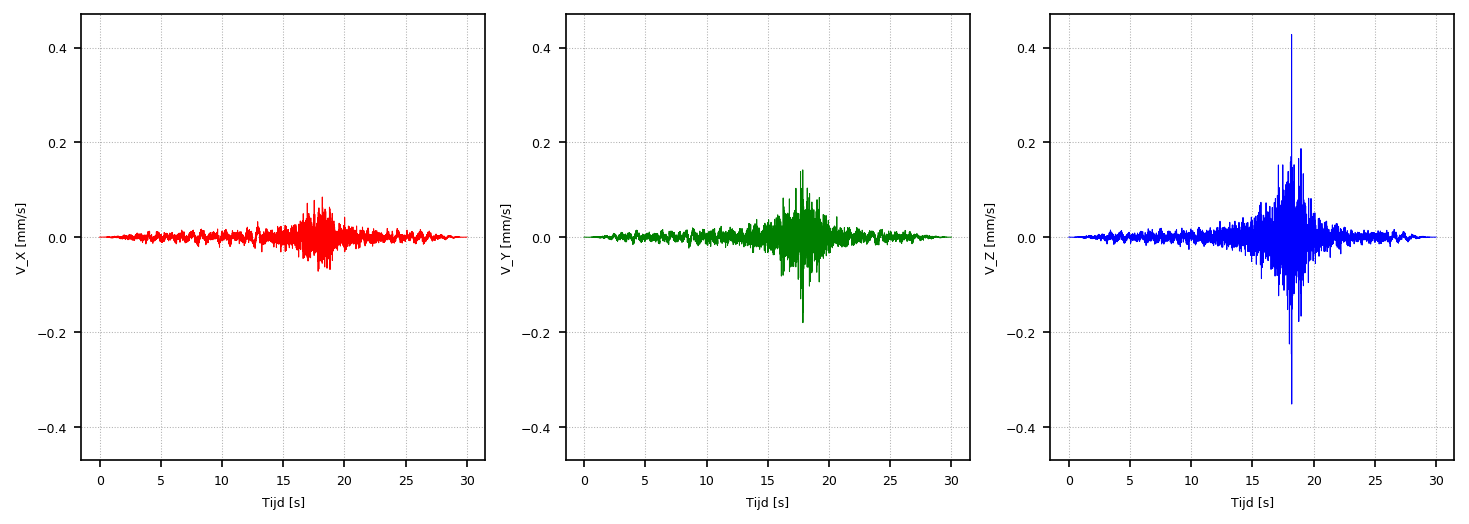

In [39]:
fig, ax = plt.subplots(1, 3, figsize=plotsize, dpi=plot_dpi)

ax[0].plot(T, VX, color='r', linewidth=0.5, label='VX')
ax[1].plot(T, VY, color='g', linewidth=0.5, label='VY')
ax[2].plot(T, VZ, color='b', linewidth=0.5, label='VZ')

for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    ax[i].set_ylim([-1.1 * Vmax, 1.1 * Vmax])
    ax[i].set_xlabel('Tijd [s]', fontsize=6)
    ax[i].set_ylabel(V[i], fontsize=6)

plt.show()

#### Signaalbewerking (voor Fourier Transformatie)

In [40]:
import math
import numpy as np

Tukey window toepassen ter verbetering signaalverwerking:

In [41]:
nn = len(T)
alpha = 0.3

nn

30000

In [42]:
def w0(st):
    if 0 <= st <= 0.5 * alpha * nn:
        w = 0.5 * (1 + math.cos(math.pi * ((2 * st) / (alpha * nn) - 1)))
    elif (1 - 0.5 * alpha) * nn <= st <= nn:
        w = 0.5 * (1 + math.cos(math.pi * ((2 * st) / (alpha * nn) - 2 / alpha + 1)))
    else:
        w = 1
    return w

n = np.linspace(0, nn, nn)

w = []
for i in range(len(n)):
    w = np.append(w, w0(n[i]))

In [43]:
plotsize = (20/2.54,5/2.54) #afmeting in inches
plot_dpi = 150
font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)

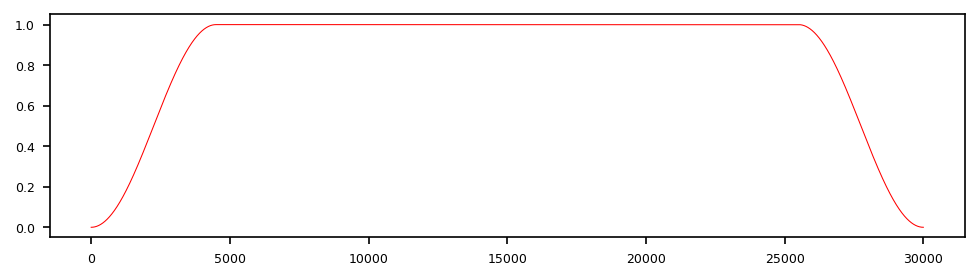

In [44]:
fig, ax = plt.subplots(figsize=plotsize, dpi=plot_dpi)

ax.plot(n, w, color='r', linewidth=0.5, label='Tukey window')

plt.show()

<font color='red'>ToDo: Tukey window toepassen op trillingssignalen</font>

In [14]:
for i in range(len(VX)):
    VX[i] = w0(i) * VX[i]
    VY[i] = w0(i) * VY[i]
    VZ[i] = w0(i) * VZ[i]

In [45]:
plotsize = (30/2.54,10/2.54) #afmeting in inches
plot_dpi = 150
font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)

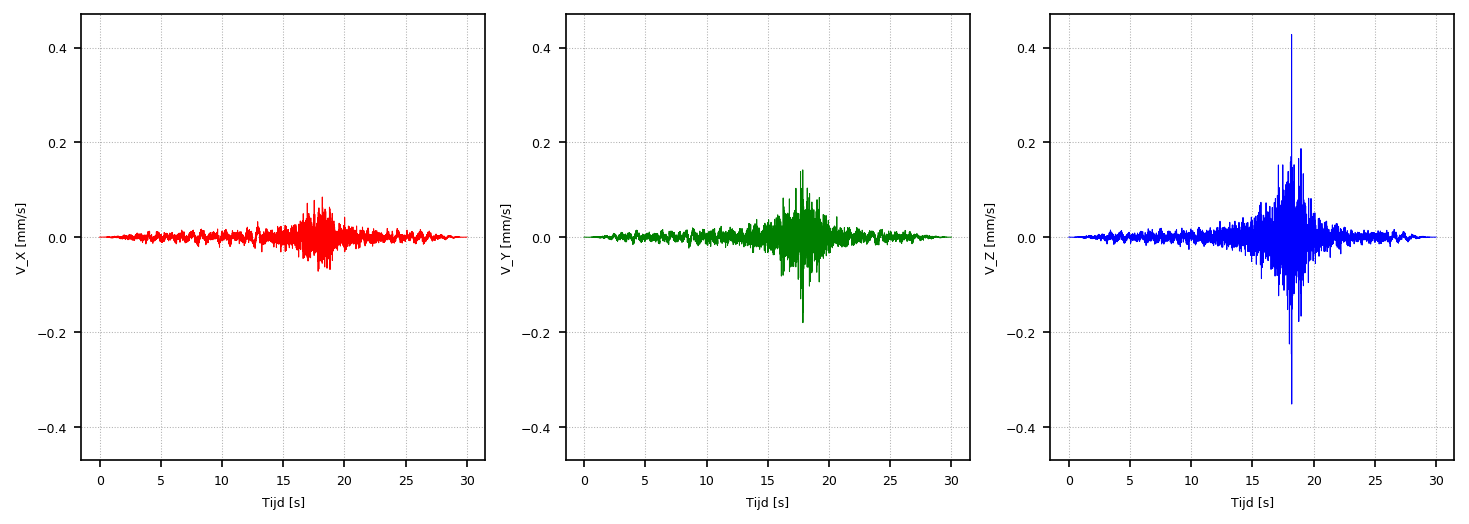

In [46]:
fig, ax = plt.subplots(1, 3, figsize=plotsize, dpi=plot_dpi)

ax[0].plot(T, VX, color='r', linewidth=0.5, label='VX')
ax[1].plot(T, VY, color='g', linewidth=0.5, label='VY')
ax[2].plot(T, VZ, color='b', linewidth=0.5, label='VZ')

for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    #ax[i].set_xlim([0, 10])
    ax[i].set_ylim([-1.1 * Vmax, 1.1 * Vmax])
    ax[i].set_xlabel('Tijd [s]', fontsize=6)
    ax[i].set_ylabel(V[i], fontsize=6)

plt.show()

Signaal aanvullen tot $2^{m}$ datapunten (t.b.v. Fourier transformatie):

In [17]:
# Signaal
m = math.ceil(math.log(nn, 2))
nn_ = 2**m

d = nn_ - nn
step = list(T)[0]

z1 = np.zeros((d, 1))
z2 = np.linspace(max(T), max(T) + d * step, d)
#d, step, max(T), z2

In [18]:
T_ = np.append(T, z2)
VX_ = np.append(VX, z1)
VY_ = np.append(VY, z1)
VZ_ = np.append(VZ, z1)

Aangepast signaal:

In [47]:
plotsize = (30/2.54,10/2.54) #afmeting in inches
plot_dpi = 150
font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)

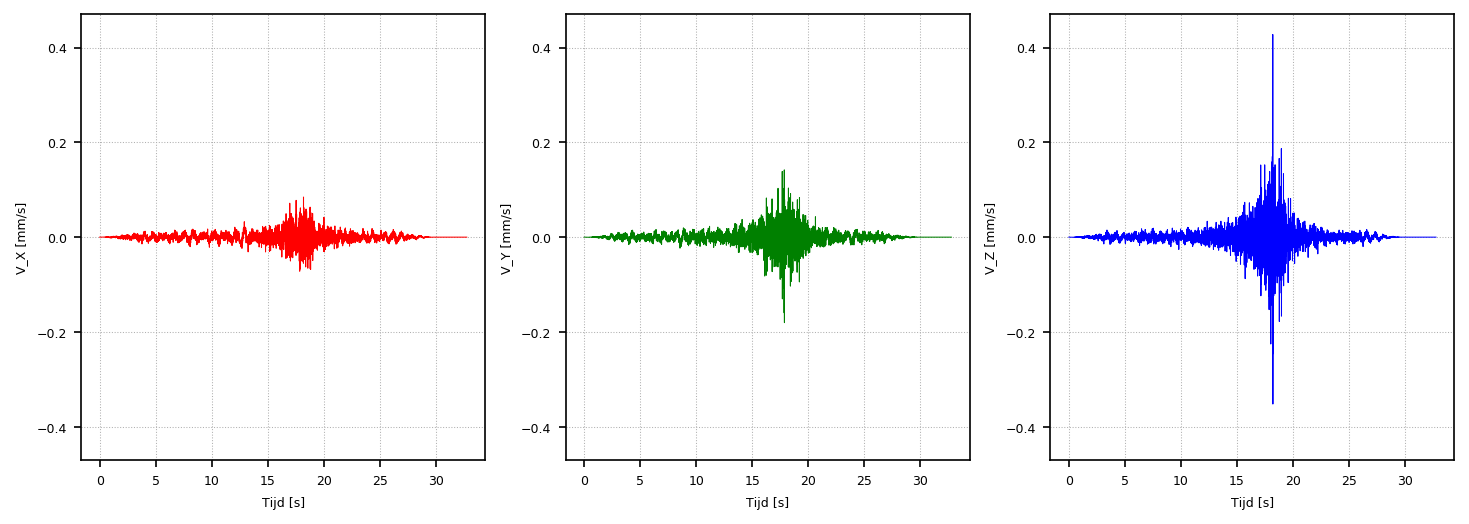

In [48]:
fig, ax = plt.subplots(1, 3, figsize=plotsize, dpi=plot_dpi)

ax[0].plot(T_, VX_, color='r', linewidth=0.5, label='VX')
ax[1].plot(T_, VY_, color='g', linewidth=0.5, label='VY')
ax[2].plot(T_, VZ_, color='b', linewidth=0.5, label='VZ')

for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    ax[i].set_ylim([-1.1 * Vmax, 1.1 * Vmax])
    ax[i].set_xlabel('Tijd [s]', fontsize=6)
    ax[i].set_ylabel(V[i], fontsize=6)

plt.show()

#### Fourier transformatie

In [49]:
from scipy.fft import fft, ifft

# Number of sample points
nn = len(T_)
x = list(T_)

In [50]:
VV = [list(VX_), list(VY_), list(VZ_)]

yf = []

for i in range(len(VV)):
    if i == 0:
        yf = fft(VV[i])
    else:
        yf = np.vstack((yf, fft(VV[i])))

xf = np.linspace(0.0, 1.0/(2.0*step), nn//2)

In [51]:
Amax = max(max(2.0/nn * np.abs(yf[0][0:nn//2])), max(2.0/nn * np.abs(yf[1][0:nn//2])), max(2.0/nn * np.abs(yf[2][0:nn//2])))

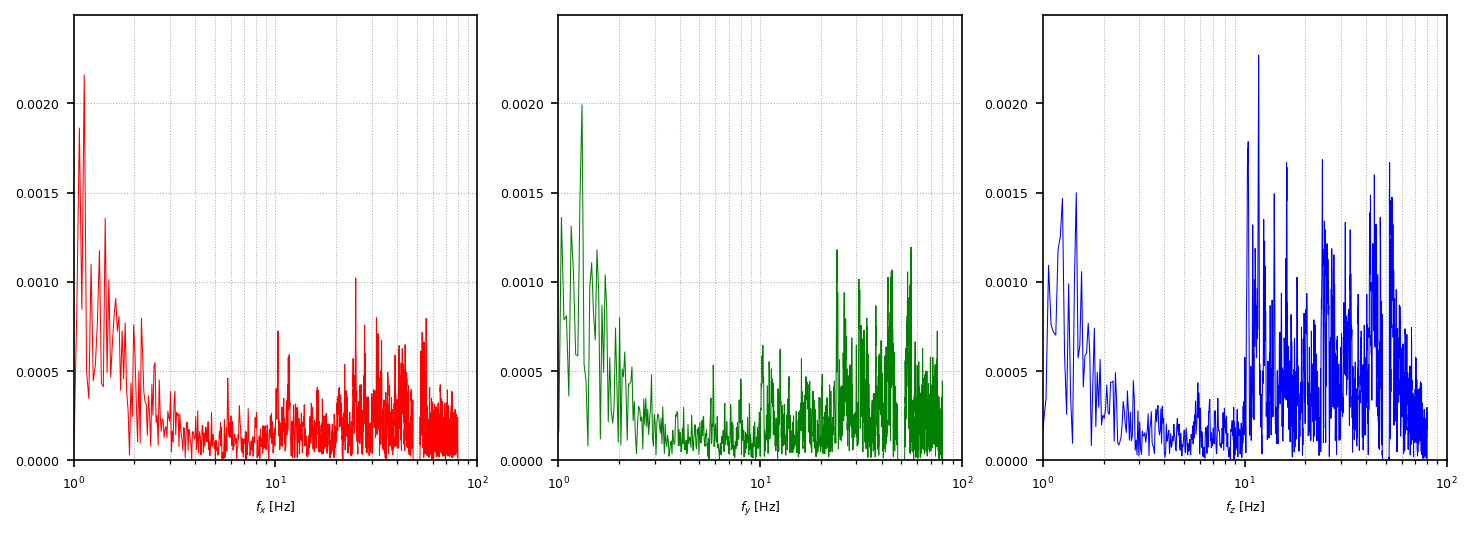

In [71]:
fig, ax = plt.subplots(1, 3, figsize=plotsize, dpi=plot_dpi)

f = ['$f_{x}$ [Hz]', '$f_{y}$ [Hz]', '$f_{z}$ [Hz]']

ax[0].plot(xf, 2.0/nn * np.abs(yf[0][0:nn//2]), color='r', linewidth=0.5, label='VX')
ax[1].plot(xf, 2.0/nn * np.abs(yf[1][0:nn//2]), color='g', linewidth=0.5, label='VY')
ax[2].plot(xf, 2.0/nn * np.abs(yf[2][0:nn//2]), color='b', linewidth=0.5, label='VZ')

for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    ax[i].set_ylim([0, 1.1 * Amax])
    ax[i].set_xlabel(f[i], fontsize=6)
    ax[i].set_xscale('log')
    ax[i].set_xlim([1, 100])

plt.grid()
plt.show()

<font color = 'red'>VERGELIJKEN MET MATHCAD SHEET<br/>
TERTSBANDEN INBOUWEN</font>

#### Omzetten naar tertz banden

In [54]:
tz = np.linspace(0,20,21)
fs = 1 / step

# Respectively tertz band mid, left and right
f_tzc = 1000 * (2**(1/3))**(-30+tz)
f_tzl = f_tzc / (2**(1/6))
f_tzr = f_tzc * (2**(1/6))

ppl = []
ppr = []
[yf_avgx, yf_avgy, yf_avgz] = [[],[],[]]
for i in range(len(f_tzl)):
    ppl = np.append(ppl, int(round(f_tzl[i] * nn / fs)))
    ppr = np.append(ppr, int(round(f_tzr[i] * nn / fs)))
    yf_avgx = np.append(yf_avgx, sum(np.abs(yf[0][0:nn//2][x]) for x in range(int(ppl[i]), int(ppr[i]))) / (ppr[i] - ppl[i] + 1))
    yf_avgy = np.append(yf_avgy, sum(np.abs(yf[1][0:nn//2][x]) for x in range(int(ppl[i]), int(ppr[i]))) / (ppr[i] - ppl[i] + 1))
    yf_avgz = np.append(yf_avgz, sum(np.abs(yf[2][0:nn//2][x]) for x in range(int(ppl[i]), int(ppr[i]))) / (ppr[i] - ppl[i] + 1))

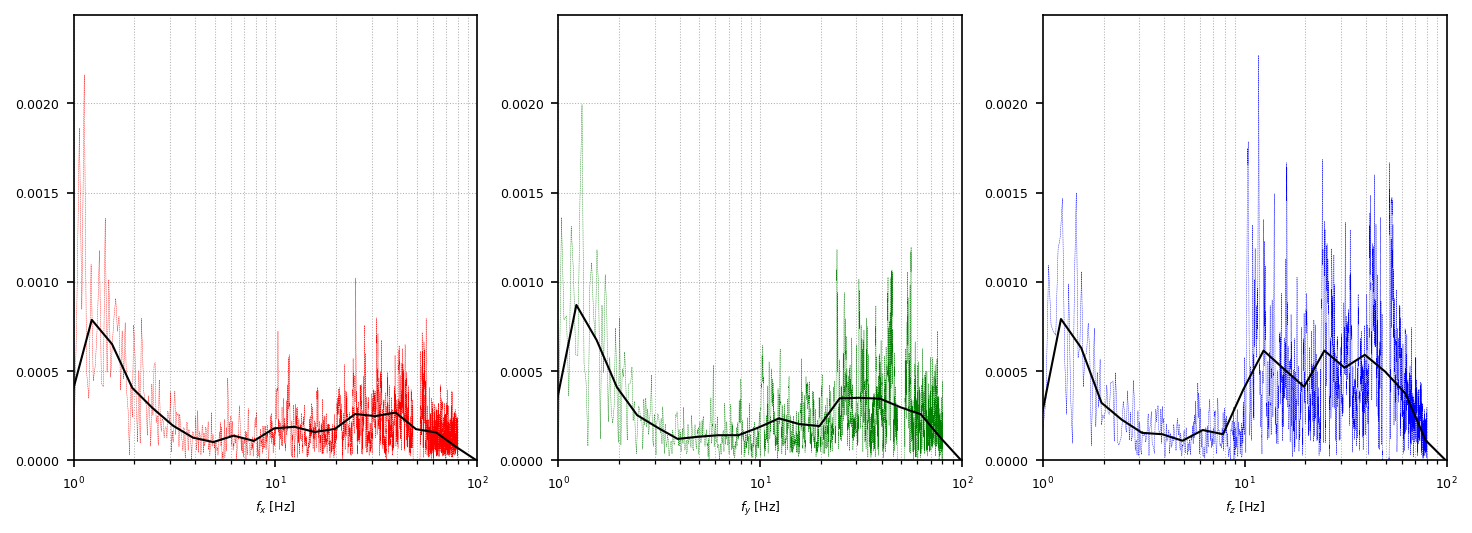

In [78]:
fig, ax = plt.subplots(1, 3, figsize=plotsize, dpi=plot_dpi)

ax[0].plot(xf, 2.0/nn * np.abs(yf[0][0:nn//2]), color='r', linewidth=0.2, linestyle='--', label='VX')
ax[1].plot(xf, 2.0/nn * np.abs(yf[1][0:nn//2]), color='g', linewidth=0.2, linestyle='--', label='VY')
ax[2].plot(xf, 2.0/nn * np.abs(yf[2][0:nn//2]), color='b', linewidth=0.2, linestyle='--', label='VZ')

ax[0].plot(f_tzc, 2.0/nn * yf_avgx, color='black', linewidth=1)
ax[1].plot(f_tzc, 2.0/nn * yf_avgy, color='black', linewidth=1)
ax[2].plot(f_tzc, 2.0/nn * yf_avgz, color='black', linewidth=1)

for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    ax[i].set_ylim([0, 1.1 * Amax])
    ax[i].set_xlabel(f[i], fontsize=6)
    ax[i].set_xscale('log')
    ax[i].set_xlim([1, 100])

plt.grid()
plt.show()

#### Roundtrip test

In [58]:
fy = ifft(yf[2])

G:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


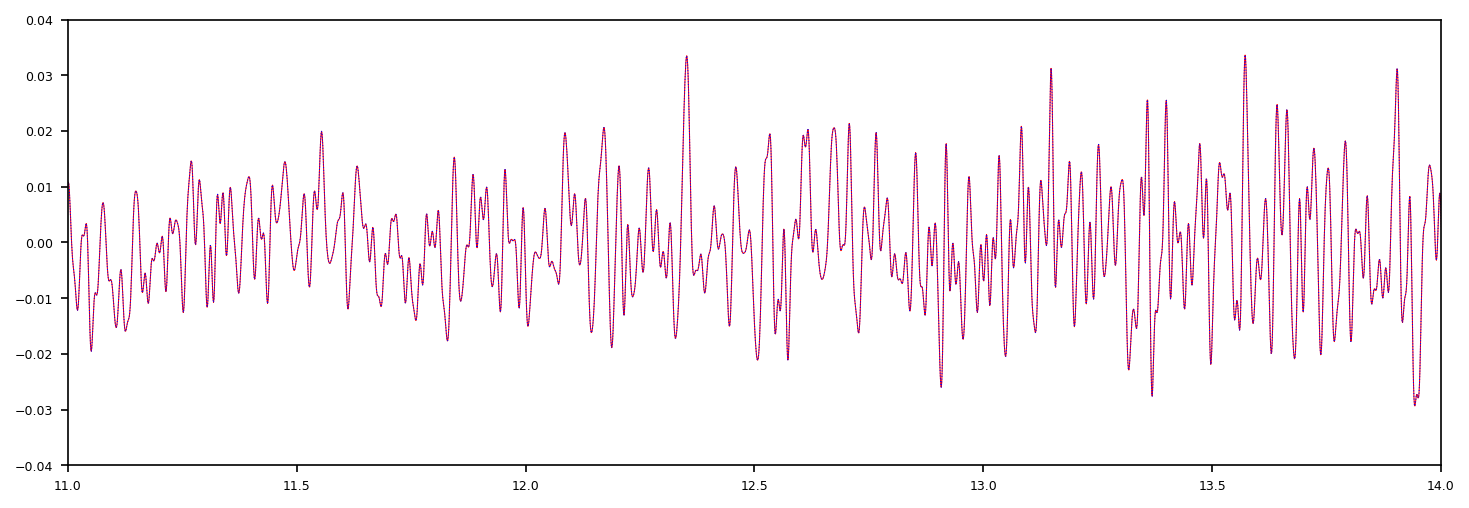

In [59]:
fig, ax = plt.subplots(figsize=plotsize, dpi=plot_dpi)

ax.plot(T_, VZ_, color='r', linewidth=0.5, label='VX')
ax.plot(T_, fy, color='b', linewidth=0.5, linestyle='dotted', label='ifft')

ax.set_xlim([11,14])
ax.set_ylim([-0.04,0.04])

plt.show()